In [1]:
%load_ext rpy2.ipython

In [2]:
from IPython.display import FileLink

In [3]:
%%R
library(ggplot2)
library(plyr); library(dplyr); library(tidyr)
library(DESeq2)
library(phyloseq)

Use suppressPackageStartupMessages to eliminate package startup messages.

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:stats’:

    xtabs

The following objects a

###This file is from the [sparsity notebook](./Sparsity_make_l2fc_table.ipynb).

In [4]:
%%R
FDR = 0.10

df.rspndrs = read.csv("data/l2fc_table.csv") %>%
    group_by(OTU, Treatment) %>%
    summarize(minP = min(padj)) %>%
    filter(minP <= FDR) %>%
    group_by() %>%
    spread(Treatment, minP)

rspnse = function(x) {
    ifelse(sum(x <= FDR, na.rm = TRUE) == 2, "Both", ifelse(!is.na(x[1]), "Cellulose Only", "C Mixture"))
}

df.rspndrs$rspnse = apply(df.rspndrs[,c("13CCSS", "13CCPS")], 1, rspnse)

df.rspndrs = df.rspndrs %>% select(OTU, rspnse)

df.rspndrs

Source: local data frame [39 x 2]

        OTU         rspnse
1  OTU.1023      C Mixture
2  OTU.1087      C Mixture
3   OTU.114 Cellulose Only
4   OTU.119      C Mixture
5   OTU.120      C Mixture
6  OTU.1414 Cellulose Only
7   OTU.169 Cellulose Only
8    OTU.17 Cellulose Only
9   OTU.185           Both
10   OTU.19 Cellulose Only
..      ...            ...


In [5]:
%%R
df_all = read.csv("data/l2fc_table.csv")
head(df_all)

  sparsity_threshold Day Treatment     OTU log2FoldChange            p    Rank1
1               0.55  30    13CCSS OTU.783     -0.3370825 9.965741e-01 Bacteria
2               0.55  30    13CCSS  OTU.79      0.7598182 4.889860e-01 Bacteria
3               0.55  30    13CCSS OTU.304      0.4183648 8.089837e-01 Bacteria
4               0.55  30    13CCSS  OTU.50      0.7289694 5.252368e-01 Bacteria
5               0.55  30    13CCSS OTU.382      2.9833574 1.370092e-07 Bacteria
6               0.55  30    13CCSS OTU.465      0.5515994 6.887540e-01 Bacteria
          Rank2      Rank3        Rank4         Rank5       Rank6
1 Acidobacteria Holophagae      Sva0725          <NA>        <NA>
2 Bacteroidetes Cytophagia Cytophagales Cytophagaceae Flexibacter
3 Bacteroidetes Cytophagia Cytophagales Cytophagaceae Flexibacter
4 Bacteroidetes Cytophagia Cytophagales Cytophagaceae Flexibacter
5 Bacteroidetes Cytophagia Cytophagales Cytophagaceae Flexibacter
6 Bacteroidetes Cytophagia Cytophagales Cyto

Joining by: "OTU"


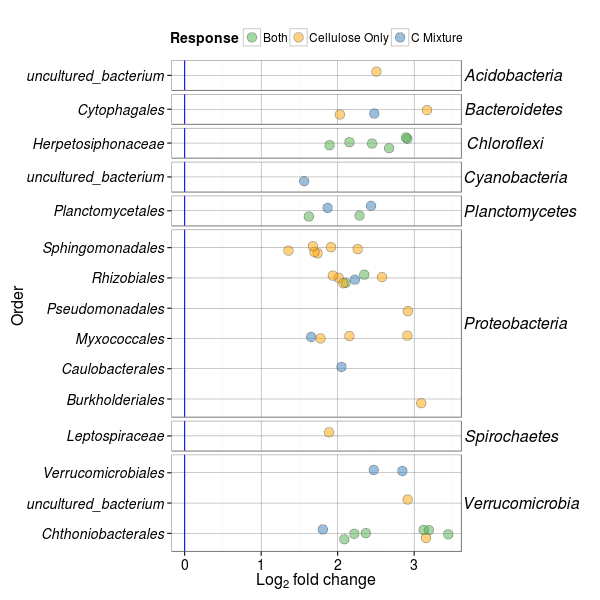

In [6]:
%%R -h 600 -w 600

colours = c("#4daf4a", "orange", "#377eb8")

FDR = 0.10 

d = df_all %>%
    arrange(desc(abs(log2FoldChange))) %>%
    select(OTU, Rank2, Rank3, Rank4, log2FoldChange, padj) %>%
    filter(padj <= FDR)

d = left_join(d, df.rspndrs)

p = ggplot(d, aes(y = Rank4, x = log2FoldChange, fill = rspnse))

p = p + geom_point(size = 4.5, shape = 21, alpha = 0.5, position = position_jitter(h = 0.2), color = "gray33")

p = p + facet_grid(Rank2 ~ ., scales = "free_y", space = "free")

p = p + geom_vline(xintercept = 0, color = "blue")

p = p + scale_fill_manual(values = colours, na.value = "black")

p = p + theme_bw()

p = p + labs(x = expression(paste(Log[2]," fold change",sep="")), y = "Order", fill = "Response")

p = p + theme(axis.text.y = element_text(size = 14, face = "italic"),
              axis.text.x = element_text(size = 14), 
              axis.title = element_text(size = 16),
              strip.text.y = element_text(angle = 0, hjust = 0.1, size = 16, face = "italic"),
              strip.background = element_blank(),
              panel.grid.major = element_line(colour = "#808080"),
              legend.position = "top",
              legend.title = element_text(size = 14),
              legend.text = element_text(size = 12))

p.fc = p

p.fc

In [7]:
%%R
ggsave("figs/l2fc_dotplotby_phylum.pdf", p.fc, h = 10, w = 8)

In [8]:
%%R
ggsave("figs/l2fc_dotplotby_phylum.png", p.fc, h = 10, w = 8)

In [9]:
FileLink("figs/l2fc_dotplotby_phylum.pdf")

/home/ashley/single_substrate/figs/l2fc_dotplotby_phylum.pdf

In [10]:
FileLink("figs/l2fc_dotplotby_phylum.png")

/home/ashley/single_substrate/figs/l2fc_dotplotby_phylum.png